In [1]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import os
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import numpy as np
import random

# Fetching the dataset

In [2]:
data_exp_path = os.getcwd()
knn_path = os.path.abspath(os.path.join(data_exp_path, '../'))
repo_path = os.path.abspath(os.path.join(knn_path, '../'))
data_path = os.path.abspath(os.path.join(repo_path, '../data'))
augmented_dataset = os.path.abspath(os.path.join(data_path, 'AugmentedAlzheimerDataset'))
original_dataset = os.path.abspath(os.path.join(data_path, 'OriginalDataset'))

In [3]:
directory = original_dataset
dataset = []

categories = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

counter = 0
for category in categories:
    path = os.path.join(directory, category)
    label = categories.index(category)
    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        brain_img = imread(imgpath, 0)
        image = np.array(brain_img).flatten()
        dataset.append([image, label])
        counter += 1
        
        if counter % 1000 == 0:
            print("Loaded", counter)

Loaded 1000
Loaded 2000
Loaded 3000
Loaded 4000
Loaded 5000
Loaded 6000


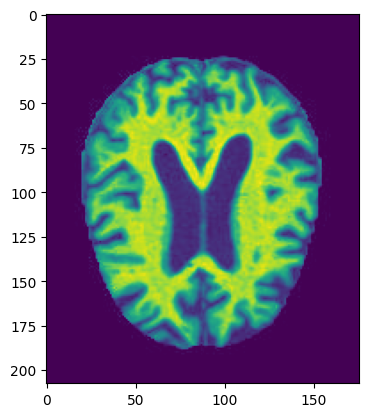

In [4]:
plt.imshow(dataset[0][0].reshape(208, 176))

# Data Preprocessing

In [5]:
def shuffle_data(data=dataset, num_shuffles=3):
    def shuffle_value():
        return random.random()
    
    for i in range(num_shuffles):
        random.shuffle(data)
        
    return data

In [6]:
# Show the dataset BEFORE shuffling:
print("Dataset is a", type(dataset), "of length", len(dataset))
print("Each row corresponds to an image")

print("\nLet's dive into each of the images")
print("Each image is a", type(dataset[0]), "of length", len(dataset[0]))

print("\nThe first element of the list stores the image itself, and the second element is the class")
print("Let's look through the first element of the list")

print("\nThis element is a", type(dataset[0][0]), "with shape", dataset[0][0].shape)
print("Thus, it is the image flattened into an array")

Dataset is a <class 'list'> of length 6400
Each row corresponds to an image

Let's dive into each of the images
Each image is a <class 'list'> of length 2

The first element of the list stores the image itself, and the second element is the class
Let's look through the first element of the list

This element is a <class 'numpy.ndarray'> with shape (36608,)
Thus, it is the image flattened into an array


### Shuffling and Verification

In [7]:
# Let's store the first image of the original list to guarantee that shuffling has actually taken place
first_image_original = dataset[0][0]

In [8]:
dataset = shuffle_data(dataset)

In [9]:
# Now to verify that the dataset was actually shuffled...
first_image_new = dataset[0][0]

if (first_image_original == first_image_new).all():
    print("Dataset was NOT shuffled.")
else:
    print("Dataset was shuffled. Images are different.")

Dataset was shuffled. Images are different.


In [10]:
count, total = 0, 0
for pixel in range(first_image_new.size):
    if first_image_new[pixel] != first_image_original[pixel]:
        count += 1
    total += 1
print("{:.2f}% of pixels differ".format(count * 100 / total))

51.79% of pixels differ


### Scaling data

In [11]:
# X is all of our images
X = [x[0] for x in dataset]

# y is our associated targets
y = [x[1] for x in dataset]

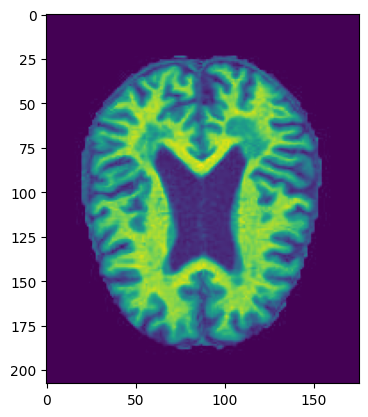

In [12]:
# verifying that this actually worked
plt.imshow(X[0].reshape(208, 176))

In [13]:
scaled_X = scale(X)

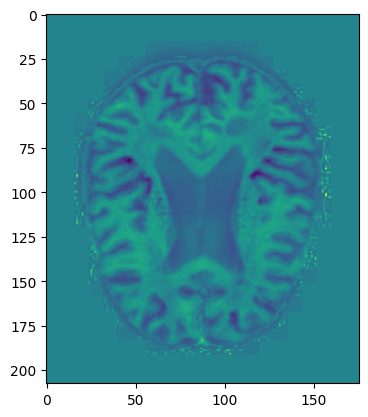

In [14]:
# Verify that scaling did not mess anything up
plt.imshow(scaled_X[0].reshape(208, 176))

In [23]:
k = 4  # We have four classes, let's use that many clusters
kmeans_cluster = KMeans(init='random', n_clusters=k, n_init=5, random_state=0)
kmeans_cluster.fit(scaled_X)

KMeans(init='random', n_clusters=4, n_init=5, random_state=0)

The following code gets the number of images that belong to each cluster found in KMeans.
It also fetches the number of images that were placed into the various classes in our dataset.

In [24]:
# Get counts of clusters
counts_clusters = np.unique(kmeans_cluster.labels_, return_counts=True)
print("Cluster Counts:", counts_clusters)

# Get counts of y
counts_y = np.unique(y, return_counts=True)
print("Y Counts:", counts_y)

Cluster Counts: (array([0, 1, 2, 3]), array([1988, 1182, 1761, 1469], dtype=int64))
Y Counts: (array([0, 1, 2, 3]), array([ 896,   64, 3200, 2240], dtype=int64))


# Analysis

We took a slightly unique approach to using K-Means.

While it is an unsupervised learning model, we figured we could attempt to use it to test the quality of how the dataset was divided into classes.

Since each class is composed of only a few brains (and their associated scans), we could probably expect to have all images fall naturally into the classes to which they were assigned by running a clustering algorithm.

However, we did NOT see that.

While this isn't a foolproof methodology, it gives us key insights into our data. 

We now believe that the dataset classes may have been arbitrarily placed together, and while we can classify them well among the classes that they were placed into, they may not actually reflect a clear division in terms of their severity.